In [8]:
import numpy as np
import os
import csv
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\DAEM-Modified.xlsx')
s1 = wb['Sparkleberry_dead']
t = get_xcel_col(s1, 'A', 11, 57)
T_c = get_xcel_col(s1, 'B', 11, 57)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 57)
m_n = m_e / np.array(s1['D11'].value)
V_e = 1 - m_n
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    return(r_e)
V_in = 0.632
A = 4170
E = 70400

def r_m(t,A,E,V_in):
    dt2 = np.zeros(len(t)-1)
    dV_o = np.zeros(len(t)-1)
    r_m = np.zeros(len(t)-1)
    
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    dV_o[0] = 0
    r_m[0] = A*np.exp(-E/R/T[0])*(V_in-dV_o[0])

    for i in range(1, len(t)-1):
        dV_o[i] = dV_o[i-1]+r_m[i-1]*dt2[i]
        r_m[i] = A*np.exp(-E/R/T[i])*(V_in-dV_o[i])
    return(r_m, dV_o)
def f(X):
    A,E,V_in = X
    e1 = (V_e[0:-1] - r_m(t,A,E,V_in)[1])**2
    e2 = (r_e(V_e, t) - r_m(t,A,E,V_in)[0])**2
    return(sum(e1) + sum(e2))

res = minimize(f,(A,E,V_in))
A,E,V_in = res.x
print(A)
print(E)
print(V_in)


e1 = (V_e[0:-1] - r_m(t,A,E,V_in)[1])**2
e2 = (r_e(V_e, t) - r_m(t,A,E,V_in)[0])**2


4582.924479779959
69980.08775716089
0.5552135104621835


In [10]:
t2 = get_xcel_col(s1, 'Q', 11, 56)
T_c2 = get_xcel_col(s1, 'R', 11, 56)
T2 = T_c2 + np.array(273.15)
m_e2 = get_xcel_col(s1, 'T', 11, 56)
m_n2 = m_e2 / np.array(s1['T11'].value)
V_e2 = 1 - m_n2
def r_e2(V_e2, t2):
    dV_e2 = []
    dt1_2 = []
    for i in range(1, len(V_e2)):
        dV_e2.append(V_e2[i] - V_e2[i-1])
    for i in range(1, len(t2)):
        dt1_2.append(t2[i] - t2[i-1])
    dV_e2 = np.array(dV_e2)
    dt1_2 = np.array(dt1_2)
    r_e2 = dV_e2 / dt1_2
    return(r_e2)
V_in2 = 0.632
A2 = 4170
E2 = 70400

def r_m2(t2,A2,E2,V_in2):
    dt2_2 = np.zeros(len(t2)-1)
    dV_o2 = np.zeros(len(t2)-1)
    r_m2 = np.zeros(len(t2)-1)
     
    for i in range(1, len(t2)-1):
        dt2_2[i] = t2[i] - t2[i-1] 
        
    dV_o2[0] = 0
    r_m2[0] = A2*np.exp(-E2/R/T2[0])*(V_in2-dV_o2[0])

    for i in range(1, len(t2)-1):
        dV_o2[i] = dV_o2[i-1]+r_m2[i-1]*dt2_2[i]
        r_m2[i] = A2*np.exp(-E2/R/T2[i])*(V_in2-dV_o2[i])
    return(r_m2, dV_o2)
def f2(X2):
    A2,E2,V_in2 = X2
    e1_2 = (V_e2[0:-1] - r_m2(t2,A2,E2,V_in2)[1])**2
    e2_2 = (r_e2(V_e2, t2) - r_m2(t2,A2,E2,V_in2)[0])**2
    return(sum(e1_2) + sum(e2_2))

res = minimize(f2,(A2,E2,V_in2))
A2,E2,V_in2 = res.x
print(A2)
print(E2)
print(V_in2)


e1_2 = (V_e2[0:-1] - r_m2(t2,A2,E2,V_in2)[1])**2
e2_2 = (r_e2(V_e2, t2) - r_m2(t2,A2,E2,V_in2)[0])**2

5750.824755202682
68978.19230636938
0.5465747019677778


In [11]:
t3 = get_xcel_col(s1, 'AG', 11, 55)
T_c3 = get_xcel_col(s1, 'AH', 11, 55)
T3 = T_c3 + np.array(273.15)
m_e3 = get_xcel_col(s1, 'AJ', 11, 55)
m_n3 = m_e3 / np.array(s1['AJ11'].value)
V_e3 = 1 - m_n3
def r_e3(V_e3, t3):
    dV_e3 = []
    dt1_3 = []
    for i in range(1, len(V_e3)):
        dV_e3.append(V_e3[i] - V_e3[i-1])
    for i in range(1, len(t3)):
        dt1_3.append(t3[i] - t3[i-1])
    dV_e3 = np.array(dV_e3)
    dt1_3 = np.array(dt1_3)
    r_e3 = dV_e3 / dt1_3
    return(r_e3)
V_in3 = 0.632
A3 = 4170
E3 = 70400

def r_m3(t3,A3,E3,V_in3):
    dt2_3 = np.zeros(len(t3)-1)
    dV_o3 = np.zeros(len(t3)-1)
    r_m3 = np.zeros(len(t3)-1)
    
    for i in range(1, len(t3)-1):
        dt2_3[i] = t3[i] - t3[i-1] 
        
    dV_o3[0] = 0
    r_m3[0] = A3*np.exp(-E3/R/T3[0])*(V_in3-dV_o3[0])

    for i in range(1, len(t3)-1):
        dV_o3[i] = dV_o3[i-1]+r_m3[i-1]*dt2_3[i]
        r_m3[i] = A3*np.exp(-E3/R/T3[i])*(V_in3-dV_o3[i])
    return(r_m3, dV_o3)
def f3(X3):
    A3,E3,V_in3 = X3
    e1_3 = (V_e3[0:-1] - r_m3(t3,A3,E3,V_in3)[1])**2
    e2_3 = (r_e3(V_e3, t3) - r_m3(t3,A3,E3,V_in3)[0])**2
    return(sum(e1_3) + sum(e2_3))

res = minimize(f3,(A3,E3,V_in3))
A3,E3,V_in3 = res.x
print(A3)
print(E3)
print(V_in3)

e1_3 = (V_e3[0:-1] - r_m3(t3,A3,E3,V_in3)[1])**2
e2_3 = (r_e3(V_e3, t3) - r_m3(t3,A3,E3,V_in3)[0])**2

6845.336485147722
68054.20214571428
0.5348085814325443


In [12]:
V_inT =.54
AT = 5500
ET = 69000

def totf(XT):
    AT,ET,V_inT = XT
    e1T = (V_e[0:-1] - r_m(t,AT,ET,V_inT)[1])**2
    e2T = (r_e(V_e, t) - r_m(t,AT,ET,V_inT)[0])**2
    e1_2T = (V_e2[0:-1] - r_m2(t2,AT,ET,V_inT)[1])**2
    e2_2T = (r_e2(V_e2, t2) - r_m2(t2,AT,ET,V_inT)[0])**2
    e1_3T = (V_e3[0:-1] - r_m3(t3,AT,ET,V_inT)[1])**2
    e2_3T = (r_e3(V_e3, t3) - r_m3(t3,AT,ET,V_inT)[0])**2
    return(sum(e1T) + sum(e2T) + sum(e1_2T) + sum(e2_2T) + sum(e1_3T) + sum(e2_3T))
res = minimize(totf,(AT,ET,V_inT))
AT,ET,V_inT = res.x
print(AT)
print(ET)
print(V_inT)

5578.273292677833
68869.9047664419
0.5441589790980298


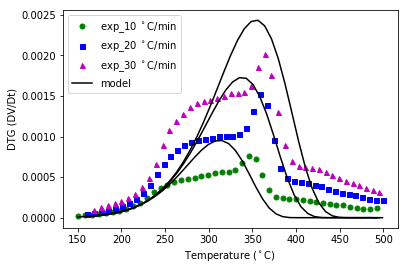

In [18]:
plt.plot(T_c[0:45],r_e(V_e,t),'o',ms=5,color = 'green',label='exp_10 $^\circ$C/min')
plt.plot(T_c2[0:44],r_e2(V_e2,t2),'s',ms=5,color = 'Blue',label='exp_20 $^\circ$C/min')
plt.plot(T_c3[0:43],r_e3(V_e3,t3),'^',ms=5,color = 'M',label='exp_30 $^\circ$C/min')
plt.plot(T_c[0:45],r_m(t,AT,ET,V_inT)[0],color = 'k',label='model')
plt.plot(T_c2[0:44],r_m2(t2,AT,ET,V_inT)[0],color = 'k')
plt.plot(T_c3[0:43],r_m3(t3,AT,ET,V_inT)[0],color = 'k')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('DTG (DV/Dt)')
plt.legend()
plt.show()

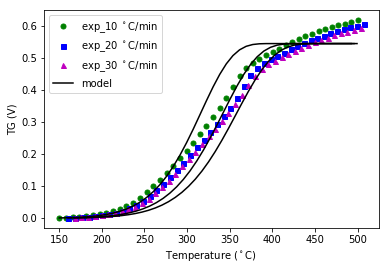

In [19]:
plt.plot(T_c,V_e,'o',ms=5,color = 'Green',label='exp_10 $^\circ$C/min')
plt.plot(T_c2,V_e2,'s',ms=5,color = 'Blue',label='exp_20 $^\circ$C/min')
plt.plot(T_c3,V_e3,'^',ms=5,color = 'M',label='exp_30 $^\circ$C/min')
plt.plot(T_c[0:45],r_m(t,AT,ET,V_inT)[1],'k',label='model')
plt.plot(T_c2[0:44],r_m2(t2,AT,ET,V_inT)[1],'k')
plt.plot(T_c3[0:43],r_m3(t3,AT,ET,V_inT)[1],'k')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('TG (V)')
plt.legend()
plt.show()